In [19]:
#Udai Nagpal, Jin Woo Won
# -----------Part 5(iv)------------
import numpy as np
import math
from numpy import linalg as LA

def sigmoid(x):
    '''Element by element sigmoid of column vector'''
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_deriv(x):
    '''Element by element sigmoid derivative of column vector'''
    return sigmoid(x) * (1 - sigmoid(x))

y = np.array([[1],[2],[-1],[-3]])
print(sigmoid(y))
print(sigmoid_deriv(y))

[[0.73105858]
 [0.88079708]
 [0.26894142]
 [0.04742587]]
[[0.19661193]
 [0.10499359]
 [0.19661193]
 [0.04517666]]


In [20]:
def stochastic_gradient_descent (input_data, output_data, inter_layer_sizes, convergence_cutoff=0.00001, max_iterations=50, minibatch_size=25, learning_rate=0.2):
    layer_sizes = [len(input_data[0])] + inter_layer_sizes + [len(output_data[0])]
    num_layers = len(layer_sizes)
    #Random Initialization
    W = [np.random.uniform(low=-2.0, high=2.0, size=(layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    dW = [[np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)] for j in range(minibatch_size)]
    b = [np.random.uniform(low=-2.0, high=2.0, size=(layer_sizes[i+1],)) for i in range(num_layers-1)]
    db = [[np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)] for j in range(minibatch_size)]
    abs_adjustments_W = [100*np.ones((layer_sizes[i],layer_sizes[i+1])) for i in range(num_layers-1)]
    abs_adjustments_b = [100*np.ones((layer_sizes[i+1],)) for i in range(len(layer_sizes)-1)]
    #print('W:' + str(W))
    #print('b:' + str(b))
    elapsed_iterations = 0
    max_adjustment_W, max_adjustment_b = 100, 100
    while(elapsed_iterations<max_iterations and max_adjustment_W>=convergence_cutoff and max_adjustment_b>=convergence_cutoff):
        stochastic_sample = np.random.choice(a=len(output_data),size=minibatch_size, replace=False)
        sample_inputs = [input_data[i] for i in stochastic_sample]
        sample_outputs = [output_data[i] for i in stochastic_sample]
        dW_sum = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
        db_sum = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
        sample_predictions = []
        running_cost = 0
        for sample in range(len(sample_outputs)):
            x = sample_inputs[sample]
            y = sample_outputs[sample]
            #print('sample input: ' + str(x))
            #print('sample output: ' + str(y))
            saved_forward_pass = [x]
            layer_input = x
            #Forward Pass
            for layer in range(num_layers-1):
                layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
                out_dim = layer_output.shape[0]
                layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
                layer_input = np.hstack(layer_input)
                saved_forward_pass.append(layer_input)
            sample_prediction = np.array(saved_forward_pass[-1:])
            running_cost += LA.norm(np.subtract(sample_prediction, np.array(y)))**2.0
            #BACKPROPAGATION
            deltas = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
            for output_component in range(len(deltas[num_layers-2])):
                deltas[num_layers-2][output_component] = -1.0 * (y[output_component]-saved_forward_pass[-1][output_component])*saved_forward_pass[-1][output_component]*(1-saved_forward_pass[-1][output_component])
            #Backpropagating Deltas
            for layer in range(num_layers-3, -1, -1):
                for neuron_ind in range(len(saved_forward_pass[layer+1])):
                    sigmoid_val = saved_forward_pass[layer+1][neuron_ind]
                    partial_sigmoid = (sigmoid_val) * (1 - sigmoid_val)
                    corr_weights = np.array(W[layer+1][neuron_ind,:])
                    corr_deltas = np.array(deltas[layer+1])
                    deltas[layer][neuron_ind] = partial_sigmoid * np.dot(corr_weights, corr_deltas)
            #Computing gradient of cost function w.r.t. W and b
            for layer in range(num_layers-1):
                for j in range(len(saved_forward_pass[layer+1])):
                    for i in range(len(saved_forward_pass[layer])):
                        dW[sample][layer][i,j] = deltas[layer][j] * saved_forward_pass[layer][i]
                    db[sample][layer][j] = deltas[layer][j]
            for i in range(len(dW_sum)):
                dW_sum[i] = np.add(dW_sum[i], dW[sample][i])
            #print(dW[sample])
            #dW_sum = np.add(dW_sum, dW[sample])
            db_sum = np.add(db_sum,db[sample])
            #print('deltas: ' + str(deltas))
            #print('dW: ' + str(dW))
            #print('db: ' + str(db))
        print("Cost Function: " + str(running_cost/(2.0*minibatch_size)))
        #print('dW sum: ' + str(dW_sum))
        db_avg = db_sum / minibatch_size
        dW_avg = [dWi/minibatch_size for dWi in dW_sum]
        #Updating Weight Parameters and Checking for Convergence
        max_adjustment_W = 0
        max_adjustment_b = 0
        for layer in range(num_layers-1):
            W[layer] = W[layer] - learning_rate * dW_avg[layer]
            b[layer] = b[layer] - learning_rate * db_avg[layer]
            adj_W = np.absolute(learning_rate * dW_avg[layer])
            adj_b = np.absolute(learning_rate * db_avg[layer])
            if (np.amax(adj_W) > max_adjustment_W):
                max_adjustment_W = np.amax(adj_W)
            if (np.amax(adj_b) > max_adjustment_b):
                max_adjustment_b = np.amax(adj_b)
        #print('Updated W: ' + str(W))
        #print('Updated b: ' + str(b))
        elapsed_iterations += 1
        #print(elapsed_iterations)
    #Final Output Predictions from Trained Model  
    final_pred_outputs = []
    for input_point in input_data:
        forward_pass = [input_point]
        layer_input = input_point
        for layer in range(num_layers-1):
            layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
            #print(layer_output)
            out_dim = layer_output.shape[0]
            layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
            layer_input = np.hstack(layer_input)
            forward_pass.append(layer_input)
        #print(forward_pass)
        final_pred_outputs.append(forward_pass[-1:])
    final_pred_outputs = [output.tolist() for out_list in final_pred_outputs for output in out_list]
    print("Final W: " + str(W))
    print("Final b: " + str(b))
    #print("Actual Outputs: " + str(output_data))
    #print("Predicted Outputs: " + str(final_pred_outputs))
    print("Total Elapsed Iterations: " + str(elapsed_iterations))

In [21]:
#TEST OF STOCHASTIC GRADIENT DESCENT: COST FUNCTION IS INDEED MINIMIZED
my_input = [i.tolist() for i in np.random.uniform(size=(100,2))]
#print(my_input)
my_output = []
for j in range(len(my_input)):
    my_output.append([sigmoid_scalar(1*my_input[j][0] +2*my_input[j][1] - 1), sigmoid_scalar(1.2*my_input[j][0] +1.7*my_input[j][1] - 1.3)])
my_output = np.array(my_output)
#print(my_output)
stochastic_gradient_descent(my_input, my_output, [2,2])

Cost Function: 0.08020260737771417
Cost Function: 0.08125098779736191
Cost Function: 0.07648413356021336
Cost Function: 0.11165630753685746
Cost Function: 0.10012048989829563
Cost Function: 0.1034880042000966
Cost Function: 0.07472345284183285
Cost Function: 0.10822910810344007
Cost Function: 0.09907708474635983
Cost Function: 0.09395581032652718
Cost Function: 0.08952037183450694
Cost Function: 0.07758493336332896
Cost Function: 0.07765682222552814
Cost Function: 0.10284104431080573
Cost Function: 0.09286021860065928
Cost Function: 0.07170588280719975
Cost Function: 0.10561109288338694
Cost Function: 0.087324947771841
Cost Function: 0.07440039251994278
Cost Function: 0.08131374441956042
Cost Function: 0.06736094660591896
Cost Function: 0.0912267596661322
Cost Function: 0.08004554154907037
Cost Function: 0.06915695919817416
Cost Function: 0.08703891453768821
Cost Function: 0.07973740813494079
Cost Function: 0.07230773539562786
Cost Function: 0.08006998366575246
Cost Function: 0.0831604

In [22]:
def adam (input_data, output_data, inter_layer_sizes, convergence_cutoff=0.000001, max_iterations=3000, minibatch_size=100, learning_rate=0.0015, weight_decay_time=100):
    beta_1 = 0.9
    beta_2 = 0.999
    epsilon = 10**(-8.0)
    layer_sizes = [len(input_data[0])] + inter_layer_sizes + [len(output_data[0])]
    num_layers = len(layer_sizes)
    #Random Initialization
    W = [np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    dW = [[np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)] for j in range(minibatch_size)]
    b = [np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i+1],)) for i in range(num_layers-1)]
    db = [[np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)] for j in range(minibatch_size)]
    m = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    v = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    m_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    v_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    abs_adjustments_W = [100*np.ones((layer_sizes[i],layer_sizes[i+1])) for i in range(num_layers-1)]
    abs_adjustments_b = [100*np.ones((layer_sizes[i+1],)) for i in range(len(layer_sizes)-1)]
    #print('W:' + str(W))
    #print('b:' + str(b))
    elapsed_iterations = 0
    weight_decay = 1
    max_adjustment_W, max_adjustment_b = 100, 100
    while(elapsed_iterations<max_iterations and max_adjustment_W>=convergence_cutoff and max_adjustment_b>=convergence_cutoff):
        stochastic_sample = np.random.choice(a=len(output_data),size=minibatch_size, replace=False)
        sample_inputs = [input_data[i] for i in stochastic_sample]
        sample_outputs = [output_data[i] for i in stochastic_sample]
        dW_sum = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
        db_sum = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
        sample_predictions = []
        running_cost = 0
        for sample in range(len(sample_outputs)):
            x = sample_inputs[sample]
            y = sample_outputs[sample]
            #print('sample input: ' + str(x))
            #print('sample output: ' + str(y))
            saved_forward_pass = [x]
            layer_input = x
            #Forward Pass
            for layer in range(num_layers-1):
                layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
                out_dim = layer_output.shape[0]
                layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
                layer_input = np.hstack(layer_input)
                saved_forward_pass.append(layer_input)
            sample_prediction = np.array(saved_forward_pass[-1:])
            running_cost += LA.norm(np.subtract(sample_prediction, np.array(y)))**2.0
            #BACKPROPAGATION
            deltas = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
            for output_component in range(len(deltas[num_layers-2])):
                deltas[num_layers-2][output_component] = -1.0 * (y[output_component]-saved_forward_pass[-1][output_component])*saved_forward_pass[-1][output_component]*(1-saved_forward_pass[-1][output_component])
            #Backpropagating Deltas
            for layer in range(num_layers-3, -1, -1):
                for neuron_ind in range(len(saved_forward_pass[layer+1])):
                    sigmoid_val = saved_forward_pass[layer+1][neuron_ind]
                    partial_sigmoid = (sigmoid_val) * (1 - sigmoid_val)
                    corr_weights = np.array(W[layer+1][neuron_ind,:])
                    corr_deltas = np.array(deltas[layer+1])
                    deltas[layer][neuron_ind] = partial_sigmoid * np.dot(corr_weights, corr_deltas)
            #Computing gradient of cost function w.r.t. W and b
            for layer in range(num_layers-1):
                for j in range(len(saved_forward_pass[layer+1])):
                    for i in range(len(saved_forward_pass[layer])):
                        dW[sample][layer][i,j] = deltas[layer][j] * saved_forward_pass[layer][i]
            db[sample] = deltas
            dW_sum = np.add(dW_sum, dW[sample])
            db_sum = np.add(db_sum,db[sample])
            #print('deltas: ' + str(deltas))
            #print('dW: ' + str(dW))
            #print('db: ' + str(db))
        print("Cost Function: " + str(running_cost/(2.0*minibatch_size)))
        #print('dW sum: ' + str(dW_sum))
        db_avg = np.divide(db_sum,minibatch_size)
        dW_avg = np.divide(dW_sum, minibatch_size)
        #Updating Weight Parameters and Checking for Convergence
        max_adjustment_W = 0
        max_adjustment_b = 0
        weight_decay = weight_decay * (2**(-1.0/weight_decay_time))
        print(weight_decay)
        m = np.add(np.multiply(beta_1, m),np.multiply((1-beta_1), dW_avg))
        v = np.add(np.multiply(beta_2, v),np.multiply((1-beta_2), np.square(dW_avg)))
        W = np.subtract(W, np.multiply(learning_rate*weight_decay, np.divide(m, np.add(np.sqrt(v), epsilon))))
        m_b = np.add(np.multiply(beta_1, m_b),np.multiply(1-beta_1,db_avg))
        v_b = np.add(np.multiply(beta_2, v_b),np.multiply(1-beta_2, np.square(db_avg)))
        b = np.subtract(b, np.multiply(learning_rate*weight_decay,np.divide(m_b, np.add(np.sqrt(v_b), epsilon))))
        for layer in range(num_layers-1):
            adj_W = np.absolute(learning_rate * np.divide(m[layer], np.add(np.sqrt(v[layer]), epsilon)))
            adj_b = np.absolute(learning_rate * np.divide(m_b[layer], np.add(np.sqrt(v_b[layer]), epsilon)))
            if (np.amax(adj_W) > max_adjustment_W):
                max_adjustment_W = np.amax(adj_W)
            if (np.amax(adj_b) > max_adjustment_b):
                max_adjustment_b = np.amax(adj_b)
        #print('Updated W: ' + str(W))
        #print('Updated b: ' + str(b))
        elapsed_iterations += 1
        #print(elapsed_iterations)
    #Final Output Predictions from Trained Model  
    final_pred_outputs = []
    for input_point in input_data:
        forward_pass = [input_point]
        layer_input = input_point
        for layer in range(num_layers-1):
            layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
            #print(layer_output)
            out_dim = layer_output.shape[0]
            layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
            layer_input = np.hstack(layer_input)
            forward_pass.append(layer_input)
        #print(forward_pass)
        final_pred_outputs.append(forward_pass[-1:])
    final_pred_outputs = [output.tolist() for out_list in final_pred_outputs for output in out_list]
    #print("Final W: " + str(W))
    #print("Final b: " + str(b))
    #print("Actual Outputs: " + str(output_data))
    #print("Predicted Outputs: " + str(final_pred_outputs))
    print("Total Elapsed Iterations: " + str(elapsed_iterations))
    return final_pred_outputs

#Testing adam
test_adam_results = adam(input_data=my_input, output_data = my_output, inter_layer_sizes=[2,2],max_iterations=50, minibatch_size=15)

Cost Function: 0.04287907191273883
0.9930924954370359
Cost Function: 0.037473430446256846
0.9862327044933592
Cost Function: 0.0487551026297551
0.979420297586927
Cost Function: 0.03237319129258839
0.9726549474122856
Cost Function: 0.02995088214645399
0.9659363289248457
Cost Function: 0.042581237486507995
0.9592641193252646
Cost Function: 0.0360269886457166
0.9526379980439376
Cost Function: 0.03182944313051823
0.9460576467255961
Cost Function: 0.03394177030399078
0.939522749214012
Cost Function: 0.03749010643525864
0.9330329915368076
Cost Function: 0.031259344574327726
0.9265880618903711
Cost Function: 0.03227425962563849
0.9201876506248754
Cost Function: 0.044810036434121056
0.9138314502294009
Cost Function: 0.032115191981627066
0.9075191553171613
Cost Function: 0.02397311464833225
0.9012504626108307
Cost Function: 0.03456871538256397
0.8950250709279729
Cost Function: 0.020365357758424126
0.8888426811665707
Cost Function: 0.03148656905896747
0.8827029962906554
Cost Function: 0.030178668

In [130]:
def adam_itr (input_data, output_data, inter_layer_sizes, max_iterations=3000, minibatch_size=100, learning_rate=0.003, weight_decay_time=8000):
    beta_1 = 0.9
    beta_2 = 0.999
    epsilon = 1e-8
    # Fixed learning rate
    decay_factor = 1
    #decay_factor = 2**(-1.0/weight_decay_time)
    layer_sizes = [len(input_data[0])] + inter_layer_sizes + [len(output_data[0])]
    num_layers = len(layer_sizes)
    
    #Random Initialization
    W = np.array([np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)])
    dW = np.array([[np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)] for j in range(minibatch_size)])
    b = np.array([np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i+1],)) for i in range(num_layers-1)])
    db = np.array([[np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)] for j in range(minibatch_size)])
    m = np.array([np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)])
    v = np.array([np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)])
    m_b = np.array([np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)])
    v_b = np.array([np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)])
    abs_adjustments_W = [100*np.ones((layer_sizes[i],layer_sizes[i+1])) for i in range(num_layers-1)]
    abs_adjustments_b = [100*np.ones((layer_sizes[i+1],)) for i in range(len(layer_sizes)-1)]
    #print('W:' + str(W))
    #print('b:' + str(b))
    elapsed_iterations = 0
    weight_decay = 1
    max_adjustment_W, max_adjustment_b = 100, 100
    
    while elapsed_iterations < max_iterations:
        stochastic_sample = np.random.choice(a=len(output_data),size=minibatch_size, replace=False)
        sample_inputs = [input_data[i] for i in stochastic_sample]
        sample_outputs = [output_data[i] for i in stochastic_sample]
        dW_sum = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
        db_sum = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
        sample_predictions = []
        running_cost = 0
        
        """Udai's code with Justin's improvement"""
            
        for sample in range(len(sample_outputs)):
            x = sample_inputs[sample]
            y = sample_outputs[sample]
            #print('sample input: ' + str(x))
            #print('sample output: ' + str(y))
            saved_forward_pass = [x]
            layer_input = x
            # Forward Pass
            for layer in range(num_layers-1):
                layer_output = np.dot(W[layer].T, layer_input) + b[layer]
                layer_input = sigmoid(layer_output)
                layer_input = np.hstack(layer_input)
                saved_forward_pass.append(layer_input)
            sample_prediction = np.array(saved_forward_pass[-1])
            running_cost += LA.norm(sample_prediction - np.array(y))**2.0
            
            # BACKPROPAGATION
            deltas = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
            for output_component in range(len(deltas[num_layers-2])):
                deltas[num_layers-2][output_component] = -1.0 *\
                (y[output_component]-saved_forward_pass[-1][output_component]) *\
                saved_forward_pass[-1][output_component] *\
                (1 - saved_forward_pass[-1][output_component])
                
            # Backpropagating Deltas
            for layer in range(num_layers-3, -1, -1):
                for neuron_ind in range(len(saved_forward_pass[layer+1])):
                    sigmoid_val = saved_forward_pass[layer+1][neuron_ind]
                    partial_sigmoid = (sigmoid_val) * (1 - sigmoid_val)
                    corr_weights = np.array(W[layer+1][neuron_ind, :])
                    corr_deltas = np.array(deltas[layer+1])
                    deltas[layer][neuron_ind] = partial_sigmoid * np.dot(corr_weights, corr_deltas)
                    
            # Computing gradient of cost function w.r.t. W and b
            for layer in range(num_layers-1):
                for j in range(len(saved_forward_pass[layer+1])):
                    for i in range(len(saved_forward_pass[layer])):
                        dW[sample][layer][i,j] = deltas[layer][j] * saved_forward_pass[layer][i]
            db[sample] = deltas
            dW_sum = dW_sum + dW[sample]
            db_sum = db_sum + db[sample]

        print("Cost Function: " + str(running_cost/(2.0*minibatch_size)) + ', Iteration: ' + str(elapsed_iterations))
        db_sum = np.array(db_sum)
        dW_sum = np.array(dW_sum)
        db_avg = db_sum / minibatch_size
        dW_avg = dW_sum / minibatch_size
        
        # Updating Weight Parameters
        max_adjustment_W = 0
        max_adjustment_b = 0
        weight_decay = weight_decay * decay_factor
        m = (beta_1 * m) + ((1 - beta_1) * dW_avg)
        v = (beta_2 * v) + ((1 - beta_2) * np.square(dW_avg))
        print(f'v.shape: {v.shape}')
        sqrt_v = [np.sqrt(v_i) for v_i in v]
        print(W)
        W = W - (learning_rate * weight_decay) * m / (sqrt_v + epsilon)
        m_b = beta_1 * m_b + (1 - beta_1) * db_avg
        v_b = (beta_2 * v_b) + (1-beta_2) * np.square(db_avg)
        sqrt_v_b = [np.sqrt(v_b_i) for v_b_i in v_b]
        b = b - (learning_rate * weight_decay) * m_b / (sqrt_v_b + epsilon)
        elapsed_iterations += 1
        
    # Final Output Predictions from Trained Model  
    final_pred_outputs = []
    for input_point in input_data:
        forward_pass = [input_point]
        layer_input = input_point
        for layer in range(num_layers-1):
            layer_output = np.dot(W[layer].T, layer_input) + b[layer]
            layer_input = sigmoid(layer_output)
            layer_input = np.hstack(layer_input)
            forward_pass.append(layer_input)
        final_pred_outputs.append(forward_pass[-1])
    final_pred_outputs = [output.tolist() for out_list in final_pred_outputs for output in out_list] # do we really need this?
    #print("Final W: " + str(W))
    #print("Final b: " + str(b))
    #print("Actual Outputs: " + str(output_data))
    #print("Predicted Outputs: " + str(final_pred_outputs))
    print("Total Elapsed Iterations: " + str(elapsed_iterations))
    return final_pred_outputs
# Testing adam
test_adam_results = adam_itr(input_data=my_input, output_data = my_output, inter_layer_sizes=[2,2],max_iterations=50, minibatch_size=15)

Cost Function: 0.04614405817950436, Iteration: 0
v.shape: (3, 2, 2)
[[[ 0.88128899 -0.4681698 ]
  [ 0.81999906  0.49795106]]

 [[ 0.44253135  0.54063536]
  [ 0.72897273  0.67220942]]

 [[ 0.54714147  0.72964032]
  [ 0.92439492 -0.84791441]]]


TypeError: can only concatenate list (not "float") to list

In [119]:
def adam_vectorized(input_data, output_data, inter_layer_sizes, max_iterations=3000, 
              minibatch_size=100, learning_rate=0.003, weight_decay_time=8000):
    
    # Initialize adam variables
    beta_1 = 0.9
    beta_2 = 0.999
    epsilon = 1e-8
    decay_factor = 1    # Fixed learning rate
#     decay_factor = 2**(-1.0/weight_decay_time)
    layer_sizes = [len(input_data[0])] + inter_layer_sizes + [len(output_data[0])]
    num_layers = len(layer_sizes)
    
    # Preprocessing
    input_data = np.array(input_data)
    output_data = np.array(output_data)
    
    # Random Initialization
    W = [np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i],layer_sizes[i+1])) 
         for i in range(len(layer_sizes)-1)]
    
    ''''''
    dW = [[np.zeros((layer_sizes[i],layer_sizes[i+1])) 
           for i in range(len(layer_sizes)-1)] for j in range(minibatch_size)]
    b = [np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i+1],)) 
         for i in range(num_layers-1)]
    
    ''''''
    db = [[np.zeros((layer_sizes[i+1],)) 
           for i in range(num_layers-1)] for j in range(minibatch_size)]
    m = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    v = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    m_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    v_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    abs_adjustments_W = [100 * np.ones((layer_sizes[i], layer_sizes[i+1])) for i in range(num_layers-1)]
    abs_adjustments_b = [100 * np.ones((layer_sizes[i+1],)) for i in range(num_layers-1)]

    # initialize NN variables
    elapsed_iterations = 0
    weight_decay = 1
    max_adjustment_W, max_adjustment_b = 100, 100
    while elapsed_iterations < max_iterations:
        
        # Take a random sample of minibatch 
        inputs = input_data[np.random.choice(input_data.shape[0], minibatch_size, replace=False), :]
        outputs = input_data[np.random.choice(output_data.shape[0], minibatch_size, replace=False), :]
        
        ''''''
        dW_sum = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
        db_sum = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
        predictions = []
        running_cost = 0
        
        """
        sample_input -> inputs
        sample_output -> outputs
        sample_prediction -> predictions
        saved_forward_pass -> sigmoided_neuron_outputs
        """
        
        # forward pass all the samples
        layer_inputs = inputs # n x 2 matrix of input X's
        sigmoided_neuron_outputs = np.array([]) # a 
        for layer in range(num_layers-1):
            layer_outputs = layer_inputs @ W[layer] + b[layer] # n x d matrix
            print(f'layer_outputs.shape:{layer_outputs.shape}')
            layer_inputs = sigmoid(layer_outputs)
            print(f'layer_inputs.shape:{layer_inputs.shape}')
            if len(sigmoided_neuron_outputs) == 0:
                sigmoided_neuron_outputs = layer_inputs
            else:
                np.vstack((sigmoided_neuron_outputs, layer_inputs))
        print(f'sigmoided_neuron_outputs.shape:{sigmoided_neuron_outputs.shape}')
        print(f'sigmoided_neuron_outputs[-1]: {sigmoided_neuron_outputs[-1]}')
        predictions = sigmoided_neuron_outputs[-1]
        running_cost += LA.norm(predictions - outputs)**2.0
        
        # Backpropagation
        deltas = sigmoid_deriv(sigmoided_neuron_outputs) # n x d, where d = # neurons in output layer
        print(f'deltas.shape:{deltas.shape}')
        for layer in range(num_layers-2, 0, -1):
            # layer+1 should contain sigmoided outputs for the layer that needs to be processed next
            print(f'layer:{layer}\ndeltas.shape:{deltas.shape}')
            deltas = deltas @ W[layer].T * sigmoid_deriv(sigmoided_neuron_outputs[layer+1])
            
        # Computing gradients of E w.r.t to W and b
        for n, x in enumerate(outputs):
            for layer in range(num_layers-1):
                for j in range(len(sigmoided_neuron_outputs[layer+1])):
                    for i in range(len(sigmoided_neuron_outputs[layer])):
                        dW[n][layer][i,j] = deltas[layer][j] * sigmoided_neuron_outputs[layer][i]
            db[n] = deltas
            dW_sum = dW_sum + dW[n]
            db_sum = db_sum + db[n]
        
        # Cost print statement
        print("Cost Function: " + str(running_cost/(2.0 * minibatch_size)) + ', Iteration: ' + str(elapsed_iterations))
        
        db_avg = db_sum / minibatch_size
        dW_avg = dW_sum / minibatch_size
        
        # Updating Weight Parameters
        max_adjustment_W = 0
        max_adjustment_b = 0
        weight_decay = weight_decay * decay_factor
        m = (beta_1 * m) + ((1 - beta_1) * dW_avg)
        v = (beta_2 * v) + ((1 - beta_2) * np.square(dW_avg))
        sqrt_v = np.sqrt(v)
        W -= (learning_rate * weight_decay) * m / (sqrt_v + epsilon)
        m_b = beta_1 * m_b + (1 - beta_1) * db_avg
        v_b = (beta_2 * v_b) + (1-beta_2) * np.square(db_avg)
        sqrt_v_b = np.sqrt(v_b)
        b -= (learning_rate * weight_decay) * m_b / (sqrt_v_b + epsilon)
        elapsed_iterations += 1
        
    # Final Output Predictions from Trained Model  
    final_pred_outputs = []
    for input_point in input_data:
        forward_pass = [input_point]
        layer_input = input_point
        for layer in range(num_layers-1):
            layer_output = np.dot(W[layer].T, layer_input) + b[layer]
            layer_input = sigmoid(layer_output)
            layer_input = np.hstack(layer_input)
            forward_pass.append(layer_input)
        final_pred_outputs.append(forward_pass[-1])
    final_pred_outputs = [output.tolist() for out_list in final_pred_outputs for output in out_list] # do we really need this?
    #print("Final W: " + str(W))
    #print("Final b: " + str(b))
    #print("Actual Outputs: " + str(output_data))
    #print("Predicted Outputs: " + str(final_pred_outputs))
    print("Total Elapsed Iterations: " + str(elapsed_iterations))
    return final_pred_outputs

# Testing adam
test_adam_results = adam_vectorized(input_data=my_input, output_data = my_output, inter_layer_sizes=[2,2],max_iterations=50, minibatch_size=15)

layer_outputs.shape:(15, 2)
layer_inputs.shape:(15, 2)
layer_outputs.shape:(15, 2)
layer_inputs.shape:(15, 2)
layer_outputs.shape:(15, 2)
layer_inputs.shape:(15, 2)
sigmoided_neuron_outputs.shape:(15, 2)
sigmoided_neuron_outputs[-1]: [0.63339319 0.69098609]
deltas.shape:(15, 2)
layer:2
deltas.shape:(15, 2)
layer:1
deltas.shape:(15, 2)


ValueError: operands could not be broadcast together with shapes (3,2) (15,2) 

In [80]:
#--------------PART 5(v)----------------
#Gathering Data & Learning Lincoln Image
%matplotlib inline
from scipy.io import loadmat
import matplotlib.pyplot as plt

x = loadmat('hw2_data.mat')
X1 = x['X1']
Y1 = x['Y1']
X2 = x['X2']
Y2 = x['Y2']
img_2 = Y2.reshape(133, 140, 3)/np.amax(Y2)
img_1 = Y1.reshape(100, 76) 
#pyplot.imshow(X=img_1, cmap='gray')
#pyplot.imshow(X=img_2)
Y1_norm = np.divide(Y1, np.amax(Y1))

#Training Lincoln Model
#Y1_pred = adam(input_data = X1, output_data = Y1_norm, inter_layer_sizes=[128,256], max_iterations=1000, minibatch_size=128, learning_rate=0.001, weight_decay_time=100)

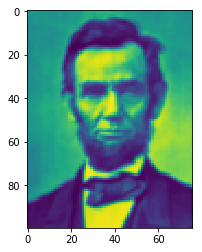

In [81]:
# Original Images
plt.imshow(img_1)

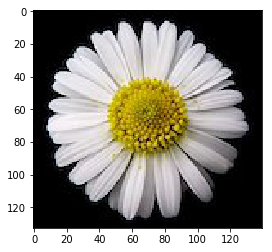

In [82]:
plt.imshow(img_2)

In [86]:
#Showing Lincoln Results
print(Y1_norm)
#print(Y1_pred)
#print(Y1_pred)
plt.imshow(X=np.array(Y1_pred).reshape(100,76)/np.amax(Y1_pred), cmap='gray')

[[0.57740587]
 [0.58577406]
 [0.60251045]
 ...
 [0.21757323]
 [0.19246861]
 [0.17573221]]


NameError: name 'Y1_pred' is not defined

In [127]:
#Training Flower Model
img_2 = Y2.reshape(133, 140, 3)/np.amax(Y2)
Y2_norm = np.divide(Y2, np.amax(Y2))
Y2_pred = adam_itr(input_data=X2, output_data=Y2_norm, inter_layer_sizes=[256,128], max_iterations=10, minibatch_size=1024, learning_rate=0.001, weight_decay_time=50)
print(Y2_pred)

Cost Function: 0.41290687769562445, Iteration: 0
v.shape: (3,)


AttributeError: 'numpy.ndarray' object has no attribute 'sqrt'

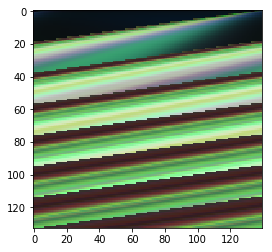

In [19]:
#Showing Flower Results
plt.imshow(X=np.array(Y2_pred).reshape(133,140,3)/np.amax(Y2_pred))
plt.show()

In [62]:
m = [np.array([[1,2],[1,1]]), np.array([[3,4],[1,2]])]
n = [np.array([2,3]), np.array([4,5])]
#print(np.add(m,n))
print(np.sqrt(m))

[[[1.         1.41421356]
  [1.         1.        ]]

 [[1.73205081 2.        ]
  [1.         1.41421356]]]


In [5]:
a = [range(10)]

0.001